![](https://github.com/GabrielTrentino/WebScraping/blob/master/00-img/01-BooksToScrape.png?raw=true)

# Análise de Books To Scrape:

[Books to Scrape](http://books.toscrape.com/) é uma pagina que possui como finalidade praticar conceitos e aplicações de Web Scraping e Web Crawling. Esse notebook tem como finalidade analisar os dados obtidos dessa página, fornecendo novos insights sobre o que foi obtido.

Primeiramente, serão importadas as bibiotecas necessárias para manipulação dos Data Sets para realizar a Análise dos dados e, em seguida, são importadas as bibliotecas utilziadas para o Plot de Gráficos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importação do Dataset:

O Data Set utilizado é um arquivo `.csv` que foi extraido da página Books to Scrape e será utilizado para análise exploratória. Esse Data Set está disponibilizado no GitHub pelo link abaixo.

In [2]:
# Link do Data Set:
url_dataset = 'https://raw.githubusercontent.com/GabrielTrentino/WebScraping/master/01-BooksToScrape/books_scrap.csv'
df = pd.read_csv(url_dataset, encoding='cp1252')

# Corrigindo a descrição da variável Estrelas:
correcao = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}
df.Estrelas = df.Estrelas.map(correcao)
df.head(5)

,Titulo,Genero,Preco,Taxa,Estrelas,Reviews,Estoque,UPC
0,A Light in the Attic,Poetry,51.77,0.0,3,0,22,a897fe39b1053632
1,Tipping the Velvet,Historical Fiction,53.74,0.0,1,0,20,90fa61229261140a
2,Soumission,Fiction,50.10,0.0,1,0,20,6957f44c3847a760
3,Sharp Objects,Mystery,47.82,0.0,4,0,20,e00eb4fd7b871a48
4,Sapiens: A Brief History of Humankind,History,54.23,0.0,5,0,20,4165285e1663650f


## Q1. Como que a distribuição das variáveis se comportam?

Um dos fatores que temos que nos atentar é sobre como as variáveis se comportam em nosso Data Set. Uma vez que precisamos detectar possíveis problemas para a nossa análise como Outliers ou valores não presentes.

In [3]:
# Obtendo a Descrição Estatística das Variáveis:
df.describe().round(2)

,Preco,Taxa,Estrelas,Reviews,Estoque
count,1000.00,1000.0,1000.00,1000.0,1000.00
mean,35.07,0.0,2.92,0.0,8.59
std,14.45,0.0,1.43,0.0,5.65
min,10.00,0.0,1.00,0.0,1.00
25%,22.11,0.0,2.00,0.0,3.00
50%,35.98,0.0,3.00,0.0,7.00
75%,47.46,0.0,4.00,0.0,14.00
max,59.99,0.0,5.00,0.0,22.00


Utilizando as Descrições Estatísticas, podemos perceber que tanto a variável **`Taxa` e a variável `Reviews` possuiram valores iguais a 0** em todas as 1000 entradas. Sabendo dessa indiferença (que pode ter sido causada pela falta de informação dos livros) **foram retiradas essas duas colunas** por não acrescentar em nada na análise.

### Corrigindo o Data Set: Eliminando `Taxa` e `Reviews`.

Como dito anteriormente, as variáveis **`Taxa` e `Reviews` serão retiradas** do Data Set por possuirem valores constantes nas 1000 entradas que são iguais a 0.

In [4]:
# Eliminado Taxa e Reviews:
df.drop(['Taxa', 'Reviews'], axis=1, inplace=True)

# Mostrando as 5 primeiras entradas do Data Frame:
df.head(5)

,Titulo,Genero,Preco,Estrelas,Estoque,UPC
0,A Light in the Attic,Poetry,51.77,3,22,a897fe39b1053632
1,Tipping the Velvet,Historical Fiction,53.74,1,20,90fa61229261140a
2,Soumission,Fiction,50.10,1,20,6957f44c3847a760
3,Sharp Objects,Mystery,47.82,4,20,e00eb4fd7b871a48
4,Sapiens: A Brief History of Humankind,History,54.23,5,20,4165285e1663650f


## Q2. Quais são os Gêneros Existentes?

Com a correção do Data Set, a pergunta que fica é: Quais são os Gêneros existentes nesse site? Parar obter os gêneros do df é utilizado `df.Genero.unique()`.

In [5]:
rep = 0

# Imprimindo os Gêneros por linhas:
for i in sorted(df.Genero.unique()):
  print(i, end = ' / ')
  if rep == 7:
    print('\n')
    rep = 0
  rep += 1

Academic / Add a comment / Adult Fiction / Art / Autobiography / Biography / Business / Childrens / 

Christian / Christian Fiction / Classics / Contemporary / Crime / Cultural / Default / 

Erotica / Fantasy / Fiction / Food and Drink / Health / Historical / Historical Fiction / 

History / Horror / Humor / Music / Mystery / New Adult / Nonfiction / 

Novels / Paranormal / Parenting / Philosophy / Poetry / Politics / Psychology / 

Religion / Romance / Science / Science Fiction / Self Help / Sequential Art / Short Stories / 

Spirituality / Sports and Games / Suspense / Thriller / Travel / Womens Fiction / Young Adult / 



## Q3. Quais são os Gêneros que possuem melhores Notas?

Seguindo nossa análise, é importante observar os Gêneros de maiores notas para recomendações futuras. Com isso, é listado os gêneros dos livros de acordo com suas notas médias.

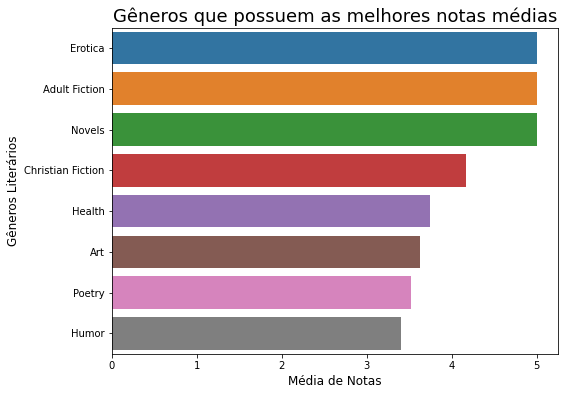

In [6]:
# Agrupando os livros por Gênero e obtendo a média das Estrelas:
generos_populares = df.groupby(['Genero']).mean().sort_values('Estrelas', ascending=False).Estrelas

# Elaborando a imagem gráfica:
fig, ax = plt.subplots(figsize = (8,6))

# Elaborando um barplot:
sns.barplot(x=generos_populares.head(8), y=generos_populares.head(8).index, ax=ax)

# Colocando as legendas:
ax.set_title("Gêneros que possuem as melhores notas médias", fontsize = 18)
ax.set_xlabel("Média de Notas", fontsize = 12)
ax.set_ylabel("Gêneros Literários", fontsize = 12);

Um problema que pode ser visto aqui é que há 3 gêneros que possuem nota perfeita (5 estrelas). A duvida que temos é que: será q todos os livros desse gênero possuem a nota 5 ou que temos a poucos livros nesse gênero?

### Removendo Gêneros com menos de 10 obras listadas:

Uma das formas que temos de verificar essa nota perfeita é removendo os gêneros que possuem menos de 10 obras listadas, dessa forma, temos:

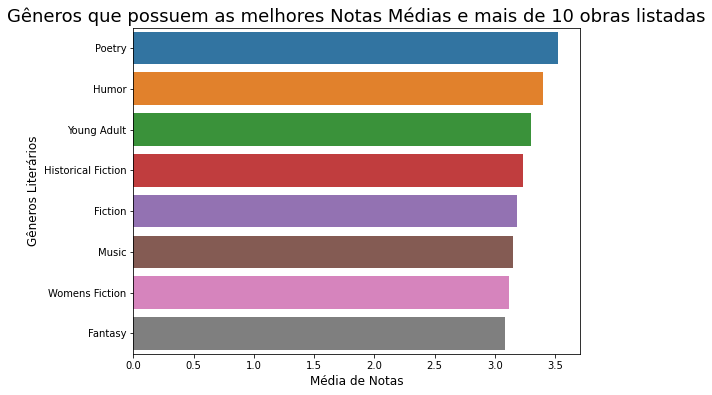

In [7]:
# Obtendo Data Frame com Generos que possuem mais de 10 obras:
df_acima_10_obras = df[df.groupby('Genero')['Genero'].transform('count').ge(10)]

# Obtendo a média de Estrelas por Gênero:
generos_populares = df_acima_10_obras.groupby(['Genero']).mean().sort_values('Estrelas', ascending=False).Estrelas

# Elaborando a imagem gráfica:
fig, ax = plt.subplots(figsize = (8,6))

# Elaborando um barplot:
sns.barplot(x=generos_populares.head(8), y=generos_populares.head(8).index, ax=ax)

# Colocando as legendas:
ax.set_title("Gêneros que possuem as melhores Notas Médias e mais de 10 obras listadas", fontsize = 18)
ax.set_xlabel("Média de Notas", fontsize = 12)
ax.set_ylabel("Gêneros Literários", fontsize = 12);

### Observando Gêneros com menos de 10 obras listadas:

Por um outro lado, quais são as notas médias dos gêneros que possuem menos de 10 livros listados?

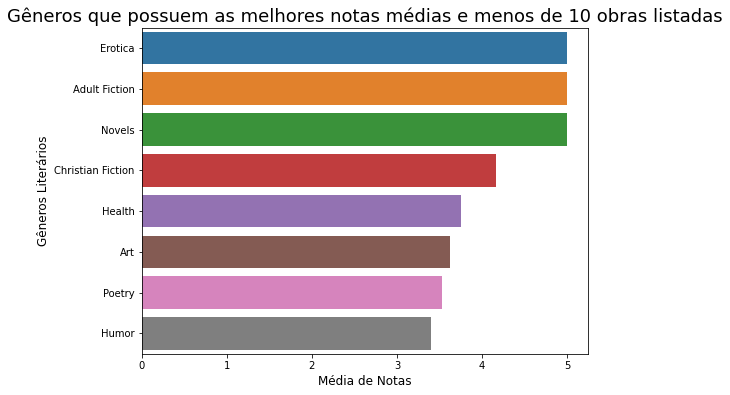

In [8]:
# Obtendo Data Frame com Gêneros que possuem menos de 10 obras:
df_abaixo_10_obras = df[df.groupby('Genero')['Genero'].transform('count').ge(-10)]

# Obtendo a média de Estrelas por Gênero:
generos_popularidade_questionavel = df_abaixo_10_obras.groupby(['Genero']).mean().sort_values('Estrelas', ascending=False).Estrelas

# Elaborando a imagem gráfica:
fig, ax = plt.subplots(figsize = (8,6))

# Elaborando um barplot:
sns.barplot(x=generos_popularidade_questionavel.head(8), y=generos_popularidade_questionavel.head(8).index, ax=ax)

# Colocando as legendas:
ax.set_title("Gêneros que possuem as melhores notas médias e menos de 10 obras listadas", fontsize = 18)
ax.set_xlabel("Média de Notas", fontsize = 12)
ax.set_ylabel("Gêneros Literários", fontsize = 12);

## Q4. Quais são os Generos que possuem maior variedade de obras?

Sabendo dos Gêneros que possuem maiores notas no site, quais seriam os gêneros que possuem maior variedade de obras?

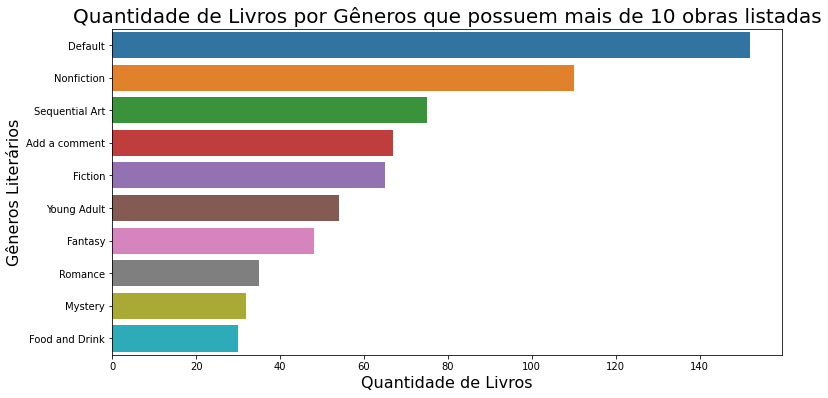

In [9]:
# Separando o Data Frame por repetição de Gênero:
qnt_livro_por_genero = df.groupby('Genero').Genero.count().sort_values(ascending=False).head(10)

# Criando a figura:
fig, ax = plt.subplots(figsize = (12,6))

# Elaborando o Bar plot com o Seaborn:
sns.barplot(x=qnt_livro_por_genero, y=qnt_livro_por_genero.index, ax=ax)

# Inserindo as Legendas e Titulos:
ax.set_title("Quantidade de Livros por Gêneros que possuem mais de 10 obras listadas", fontsize = 20)
ax.set_xlabel("Quantidade de Livros", fontsize = 16)
ax.set_ylabel("Gêneros Literários", fontsize = 16);

Podemos observar nesse gráfico que o gênero `Default` e o gênero `Add a comment` estão entre os topos na variedade, mas ele não são necesseriamente um gênero que representa um gênero literário. Outro ponto que pode-se concluir é que os gêneros de `Non Fiction` (Não Ficção) e `Art sequential` possuem as maiores representatividades.

## Q5. Qual a Quantidade de Votos para os Gêneros `Default` e `Add a comment`?

Vimos que esses dois Gêneros possuem uma maior variedade de obras, mas não representam um Gênero literário em si. Por isso, qual é a distribuição das Estrelas recebidos pelos os livros nessa categoria?

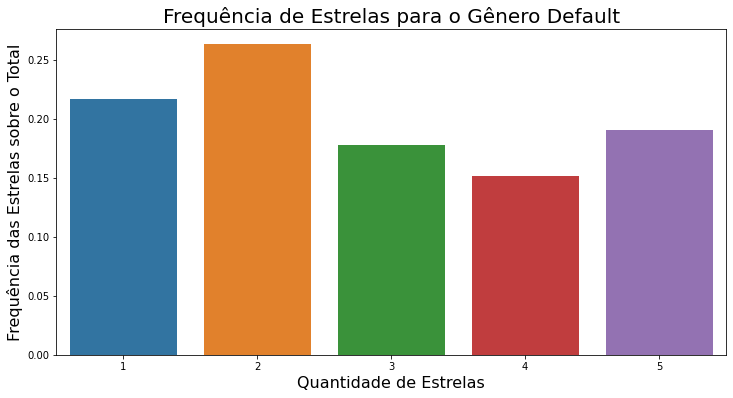

In [10]:
# Obtendo o Data Frame apenas com o Gênero Default:
df_default = df.loc[df.Genero == 'Default']

# Obtendo a Frequência de Estrelas para o Gênero Default:
qnt_porcEstrelas_default = df_default.Estrelas.value_counts()/df_default.shape[0]

# Criando a figura:
fig, ax = plt.subplots(figsize = (12,6))

# Elaborando o Bar plot com o Seaborn:
sns.barplot(x=qnt_porcEstrelas_default.index, y=qnt_porcEstrelas_default, ax=ax)

# Inserindo as Legendas e Titulos:
ax.set_title("Frequência de Estrelas para o Gênero Default", fontsize = 20)
ax.set_xlabel("Quantidade de Estrelas", fontsize = 16)
ax.set_ylabel("Frequência das Estrelas sobre o Total", fontsize = 16);

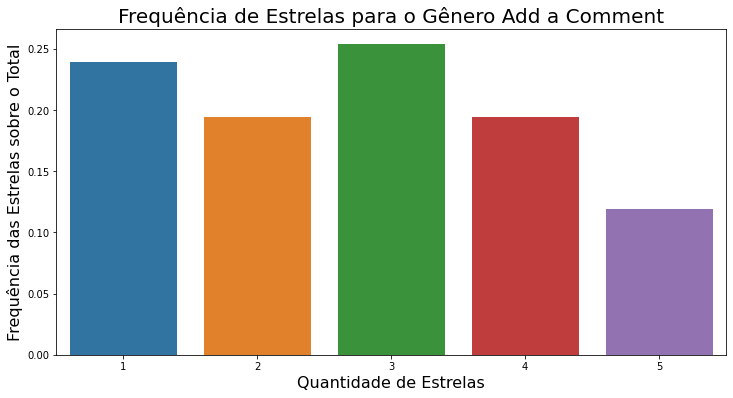

In [11]:
# Obtendo o Data Frame apenas com o Gênero Add a comment:
df_addcomment = df.loc[df.Genero == 'Add a comment']

# Obtendo a Frequência de Estrelas para o Gênero Default:
qnt_porcEstrelas_addcomment = df_addcomment.Estrelas.value_counts()/df_addcomment.shape[0]

# Criando a figura:
fig, ax = plt.subplots(figsize = (12,6))

# Elaborando o Bar plot com o Seaborn:
sns.barplot(x=qnt_porcEstrelas_addcomment.index, y=qnt_porcEstrelas_addcomment, ax=ax)

# Inserindo as Legendas e Titulos:
ax.set_title("Frequência de Estrelas para o Gênero Add a Comment", fontsize = 20)
ax.set_xlabel("Quantidade de Estrelas", fontsize = 16)
ax.set_ylabel("Frequência das Estrelas sobre o Total", fontsize = 16);

Para o gênero `Default` vimos uma partição quase q igual entre as notas, mas é observado que mais de 25% dos livros recebem 2 Estrelas de Voto. Em contra partida, o Gênero `Add a comment` recebe 3 estrelas em 25% dos casos, chegando a receber 5 estrelas em 11% dos casos.

## Q6. Quais Gêneros possuem menor variedade de livros?

Além de observar os livros com maior relevância ou que atraem a atenção dos usuários, outro fator que deve-se observar são os livros com menor variedade. Pois afinal, os usuários não teriam interesses nesses temas? O site deve se preocupar em incentivar novos gêneros? É uma área em que a empresa pode vir a se interessar?

Essas perguntas devem ser respondidas por um Cientista de Dados, porém, os dados disponíveis são insuficientes para gerar esses tipos de conclusões ou tomadas de decisões.

In [12]:
# Contando a quantidade de livros nos gêneros:
generos_com_menor_variedade = df.groupby('Genero').Genero.count().sort_values(ascending=True)
generos_com_menor_variedade.head(12)

Genero
Academic         1
Paranormal       1
Parenting        1
Erotica          1
Cultural         1
Novels           1
Short Stories    1
Crime            1
Suspense         1
Adult Fiction    1
Historical       2
Christian        3
Name: Genero, dtype: int64

Com essa parte, observa-se que há 10 gêneros com apenas uma obra. Essa situação preocupa a empresa?

## Q7. Quais são os Gêneros com menores estoques?

Seguindo nossa análise, outro ponto que deve-se observar é a quantidade de Estoque, pois a falta de Estoque pode acarretar em poucas vendas. Porém, o baixo Estoque pode ser representado pela pouca variedade de obras, inclusive. Em seguida, na Tomada de Decisão, é selecionado os livros que possuem menos de 5 exemplares disponíveis para troca/venda.

In [13]:
# Agrupando o Data Frame por gênero e somando a quantidade de estoque:
estoque_genero = df.groupby(['Genero']).sum().sort_values('Estoque', ascending=True).Estoque
estoque_genero.head(10)

Genero
Paranormal           1
Adult Fiction        3
Parenting            3
Academic             5
Suspense             8
Short Stories        8
Novels               9
Sports and Games    10
Erotica             15
Crime               15
Name: Estoque, dtype: int64

O Gênero literário `Paranormal` apareceu tanto na Q6. quanto nessa Q7. mostrando que apenas um livro está presente no estoque e que ele é o unico de seu gênero.

## Q8. Qual é o Preço Médio dos livros por Gênero?

Como vimos na descrição estatística, os livros disponíveis no estoque variam de 10 libras até 60 libras. Porém, qual a média desses preços segundo seu gênero literário?

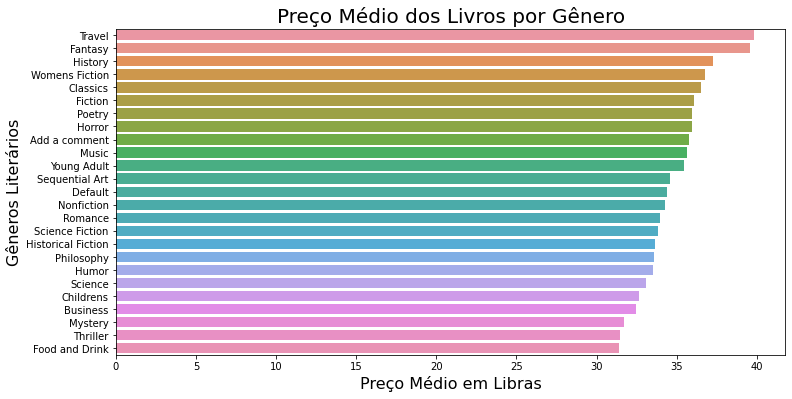

In [14]:
# Agrupando o Data Frame por Gênero e acima de 10 exemplares:
df_acima_10_obras = df[df.groupby('Genero')['Genero'].transform('count').ge(10)]

# Obtendo o preço médio dos Gêneros:
df_preco_medio = df_acima_10_obras.groupby(['Genero']).mean().sort_values('Preco', ascending=False).Preco

# Criando a figura:
fig, ax = plt.subplots(figsize = (12,6))

# Elaborando o Bar plot com o Seaborn:
sns.barplot(x=df_preco_medio, y=df_preco_medio.index, ax=ax)

# Inserindo as Legendas e Titulos:
ax.set_title("Preço Médio dos Livros por Gênero", fontsize = 20)
ax.set_xlabel("Preço Médio em Libras", fontsize = 16)
ax.set_ylabel("Gêneros Literários", fontsize = 16);

Pode-se observar que os gêneros de `Travel` e `Fantasy` possuem o primeiro patamar, possuindo aproximadamente o preço médio de 40 libras por exemplar.

## Q9. Qual a possibilidade de movimentação monetária de cada livro?

O ultimo ponto de análise desse Data Set é sobre a movimentação monetária que cada livro pode alcançar com o estoque atual.

In [15]:
# Criando uma nova coluna (variável) no Data Frame:
df['Total_Arrecadavel'] = df['Preco'] * df['Estoque']

print('Pode-se movimentar cerca de {:.2f} libras se vendesse todos os livros com menos de 5 exemplares no estoque'.format(df[df.Estoque < 5].Total_Arrecadavel.sum()))
print('Esse valor corresponde à {:.2f}% do total {:.2f} de libras'.format((df[df.Estoque < 5].Total_Arrecadavel.sum()/df.Total_Arrecadavel.sum())*100, df.Total_Arrecadavel.sum()))

Pode-se movimentar cerca de 31607.00 libras se vendesse todos os livros com menos de 5 exemplares no estoque
Esse valor corresponde à 10.53% do total 300188.27 de libras


In [16]:
print('Pode-se movimentar cerca de {:.2f} libras se vendesse todos os livros com a partir de 5 exemplares no estoque'.format(df[df.Estoque>= 5].Total_Arrecadavel.sum()))
print('Esse valor corresponde à {:.2f}% do total {:.2f} de libras'.format((df[df.Estoque >= 5].Total_Arrecadavel.sum()/df.Total_Arrecadavel.sum())*100, df.Total_Arrecadavel.sum()))

Pode-se movimentar cerca de 268581.27 libras se vendesse todos os livros com a partir de 5 exemplares no estoque
Esse valor corresponde à 89.47% do total 300188.27 de libras


# Informações para Tomadas de Decisões:

Finalizando a Análise desse Data Set, é necessário criar as possíveis recomendações que a empresa pode tomar. Entre elas:

* Cuidado com os livros que possuem menos de 5 exemplares em estoque;
* Cuidado dobrado para livros com popularidade entre 4 e 5 estrelas que poossuem estoques abaixo de 5 exemplares;
* Promover livros com popularidade alta e acima de 10 exemplares existentes no estoque;

## Observar Livros com Menos de 5 exemplares em estoque:

Aqui estão listados os livros que possuem menos de 5 exemplares em estoque. Os livros aqui podem ser removidos pelo sistema ou promovidos, dependendo da necessidade da empresa em questão.

In [17]:
# Imprimindo os nomes dos livros que possuem menos de 5 exemplares no Estoque atualmente:
for i in df[df.Estoque < 5].Titulo:
  print(i)

Vogue Colors A to Z: A Fashion Coloring Book
The Shining (The Shining #1)
The Pilgrim's Progress
The Perfect Play (Play by Play #1)
The Passion of Dolssa
The Jazz of Physics: The Secret Link Between Music and the Structure of the Universe
The Hunger Games (The Hunger Games #1)
The Hound of the Baskervilles (Sherlock Holmes #5)
The Gunning of America: Business and the Making of American Gun Culture
The Geography of Bliss: One Grump's Search for the Happiest Places in the World
The Demonists (Demonist #1)
The Demon Prince of Momochi House, Vol. 4 (The Demon Prince of Momochi House #4)
The Bone Hunters (Lexy Vaughan & Steven Macaulay #2)
The Beast (Black Dagger Brotherhood #14)
Some Women
Shopaholic Ties the Knot (Shopaholic #3)
Paper and Fire (The Great Library #2)
Outlander (Outlander #1)
Orchestra of Exiles: The Story of Bronislaw Huberman, the Israel Philharmonic, and the One Thousand Jews He Saved from Nazi Horrors
No One Here Gets Out Alive
Night Shift (Night Shift #1-20)
Needful Th

## Recomendação para Comprar ou Incentivar novos Estoques:

O Data Frame elaborado nessa parte tem como objetivo de auxiliar a tomada de decisão para livros que possuem notas entre 4 e 5, mas possuem menos de 5 exemplares disponíveis para venda/troca. **No total 119 livros estão nessa área.**

In [18]:
# Elaborando o Data Frame:
df_novo_estoque = pd.DataFrame()

# Criando um laço de repetição para cada Gênero:
for i in df.Genero.unique():
  # Juntando os livros do Gênero 'i' que possuem estoque abaixo de 5 e estrela entre 4 e 5:
  livros = df[(df.Genero == i) & (df.Estoque < 5) & (df.Estrelas > 3)]
  
  # Agrupando as informações em um Data Frame:
  df_novo_estoque = pd.concat([df_novo_estoque, livros])
df_novo_estoque

,Titulo,Genero,Preco,Estrelas,Estoque,UPC,Total_Arrecadavel
909,Twenty Love Poems and a Song of Despair,Poetry,30.95,4,1,e63c3f25338baf9a,30.95
649,The Passion of Dolssa,Historical Fiction,28.32,5,4,011674f4a3834b8d,113.28
701,Voyager (Outlander #3),Historical Fiction,21.07,5,3,7feac4000cbc5859,63.21
727,The Red Tent,Historical Fiction,35.66,5,3,3c456328b04a8ee8,106.98
872,Between Shades of Gray,Historical Fiction,20.79,5,3,155e42df837ee5ff,62.37
...,...,...,...,...,...,...,...
762,The Complete Stories and Poems (The Works of E...,Classics,26.78,4,3,cad70d6ffd53912f,80.34
916,The Story of Hong Gildong,Classics,43.19,4,1,32d035df92ab9080,43.19
768,The Book of Basketball: The NBA According to T...,Sports and Games,44.84,5,3,08decd9664e5d56e,134.52
975,Icing (Aces Hockey #2),Sports and Games,40.44,4,1,3455b45888fb5053,40.44


## Recomendação para Promover Livros:

A terceira e ultima recomendação são para os livros que possuem exemplares acima de 10 unidades e notas entre 4 e 5.

No Total, foram separados 158 livros que estão nessa situação.

In [19]:
df_famosos_em_estoque = pd.DataFrame()
for i in df.Genero.unique():
  livros = df[(df.Genero == i) & (df.Estoque > 10) & (df.Estrelas > 3)]
  
  df_famosos_em_estoque = pd.concat([df_famosos_em_estoque, livros])
df_famosos_em_estoque

,Titulo,Genero,Preco,Estrelas,Estoque,UPC,Total_Arrecadavel
11,Shakespeare's Sonnets,Poetry,20.66,4,19,30a7f60cd76ca58c,392.54
47,Untitled Collection: Sabbath Poems 2014,Poetry,14.27,4,16,657fe5ead67a7767,228.32
176,Poems That Make Grown Women Cry,Poetry,14.19,4,15,31001a1210623bd4,212.85
269,salt.,Poetry,46.78,4,14,86cbddb61ea78bb7,654.92
273,"Quarter Life Poetry: Poems for the Young, Brok...",Poetry,50.89,5,14,aa35446aab16017f,712.46
...,...,...,...,...,...,...,...
200,Dark Notes,Erotica,19.19,5,15,88c21fcd38e2486e,287.85
277,Old School (Diary of a Wimpy Kid #10),Humor,11.83,5,14,02b74068fa98d8a4,165.62
296,I Know What I'm Doing -- and Other Lies I Tell...,Humor,25.98,4,14,b8a8ff84233f0570,363.72
298,"Hyperbole and a Half: Unfortunate Situations, ...",Humor,14.75,5,14,fbb21a2f71f4d981,206.50


# **Dúvidas e Redes Sociais:**
O repositório aumentará o seu tamanho de acordo com as realizações dos cursos. E claro, aceito recomendações de cursos, livros ou vídeos! Qualquer duvida me chame no [LinkedIn](https://www.linkedin.com/in/gabriel-trentino-froes-415558144/).